In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/DELL/Desktop/DATA/CodeinGrad/Projects/Car-details-v3.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
d1=data.fillna('0')
d1.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [6]:
s=d1.drop(['mileage','engine','max_power','torque','seats'],axis='columns',inplace=True)
d1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner


In [7]:
d1.describe()

,year,selling_price,km_driven
count,8128.000000,8.128000e+03,8.128000e+03
mean,2013.804011,6.382718e+05,6.981951e+04
std,4.044249,8.062534e+05,5.655055e+04
min,1983.000000,2.999900e+04,1.000000e+00
25%,2011.000000,2.549990e+05,3.500000e+04
50%,2015.000000,4.500000e+05,6.000000e+04
75%,2017.000000,6.750000e+05,9.800000e+04
max,2020.000000,1.000000e+07,2.360457e+06


In [9]:
d1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [14]:
data_set=d1[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner']]
data_set.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,2007,130000,120000,Petrol,Individual,Manual,First Owner


In [16]:
data_set['Current_Year']=2022
data_set.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,2022
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2022
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,2022
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,2022
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,2022


In [18]:
data_set['No of Years']=data_set['Current_Year']-data_set['year']
data_set.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year,No of Years
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,2022,8
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2022,8
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,2022,16
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,2022,12
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,2022,15


In [20]:
data_set.drop(['year','Current_Year'],axis='columns',inplace=True)
data_set.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,No of Years
0,450000,145500,Diesel,Individual,Manual,First Owner,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,16
3,225000,127000,Diesel,Individual,Manual,First Owner,12
4,130000,120000,Petrol,Individual,Manual,First Owner,15


In [28]:
data_set.replace({'fuel':{"Diesel":0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)
data_set.replace({'seller_type':{"Individual":0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
data_set.replace({'transmission':{"Manual":0,'Automatic':1}},inplace=True)
data_set.replace({'owner':{"First Owner":0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [31]:
data_set.head()

,selling_price,km_driven,No of Years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,8,1,0,0,1,0,1,0,0,0,0
1,370000,120000,8,1,0,0,1,0,1,0,1,0,0
2,158000,140000,16,0,0,1,1,0,1,0,0,0,1
3,225000,127000,12,1,0,0,1,0,1,0,0,0,0
4,130000,120000,15,0,0,1,1,0,1,0,0,0,0


In [29]:
data_set.head()

,selling_price,km_driven,No of Years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,8,1,0,0,1,0,1,0,0,0,0
1,370000,120000,8,1,0,0,1,0,1,0,1,0,0
2,158000,140000,16,0,0,1,1,0,1,0,0,0,1
3,225000,127000,12,1,0,0,1,0,1,0,0,0,0
4,130000,120000,15,0,0,1,1,0,1,0,0,0,0


In [22]:
data_set.corr()

,selling_price,km_driven,No of Years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.225534,-0.414092,0.206521,-0.037222,-0.195975,-0.386244,0.035084,-0.588845,-0.075669,-0.179881,0.115880,-0.118956
km_driven,-0.225534,1.000000,0.418006,0.266368,0.023458,-0.269802,0.204736,-0.084282,0.201229,0.094939,0.209532,-0.024214,0.145634
No of Years,-0.414092,0.418006,1.000000,-0.051762,0.070712,0.044633,0.246161,-0.102238,0.244707,0.207020,0.311225,-0.031877,0.280220
fuel_Diesel,0.206521,0.266368,-0.051762,1.000000,-0.074494,-0.976687,-0.000239,-0.137961,0.025519,-0.010638,0.046762,-0.017008,-0.014272
fuel_LPG,-0.037222,0.023458,0.070712,-0.074494,1.000000,-0.061584,0.021092,-0.011852,0.026397,0.014785,0.017122,-0.001700,0.017199
fuel_Petrol,-0.195975,-0.269802,0.044633,-0.976687,-0.061584,1.000000,-0.008983,0.142335,-0.034631,0.007300,-0.051046,0.017630,0.012820
seller_type_Individual,-0.386244,0.204736,0.246161,-0.000239,0.021092,-0.008983,1.000000,-0.385425,0.375234,0.066360,0.165983,-0.055297,0.116236
seller_type_Trustmark Dealer,0.035084,-0.084282,-0.102238,-0.137961,-0.011852,0.142335,-0.385425,1.000000,-0.149677,-0.025577,-0.047034,-0.004290,-0.046814
transmission_Manual,-0.588845,0.201229,0.244707,0.025519,0.026397,-0.034631,0.375234,-0.149677,1.000000,0.041761,0.119681,-0.049621,0.072274
owner_Fourth & Above Owner,-0.075669,0.094939,0.207020,-0.010638,0.014785,0.007300,0.066360,-0.025577,0.041761,1.000000,-0.087438,-0.003670,-0.040040


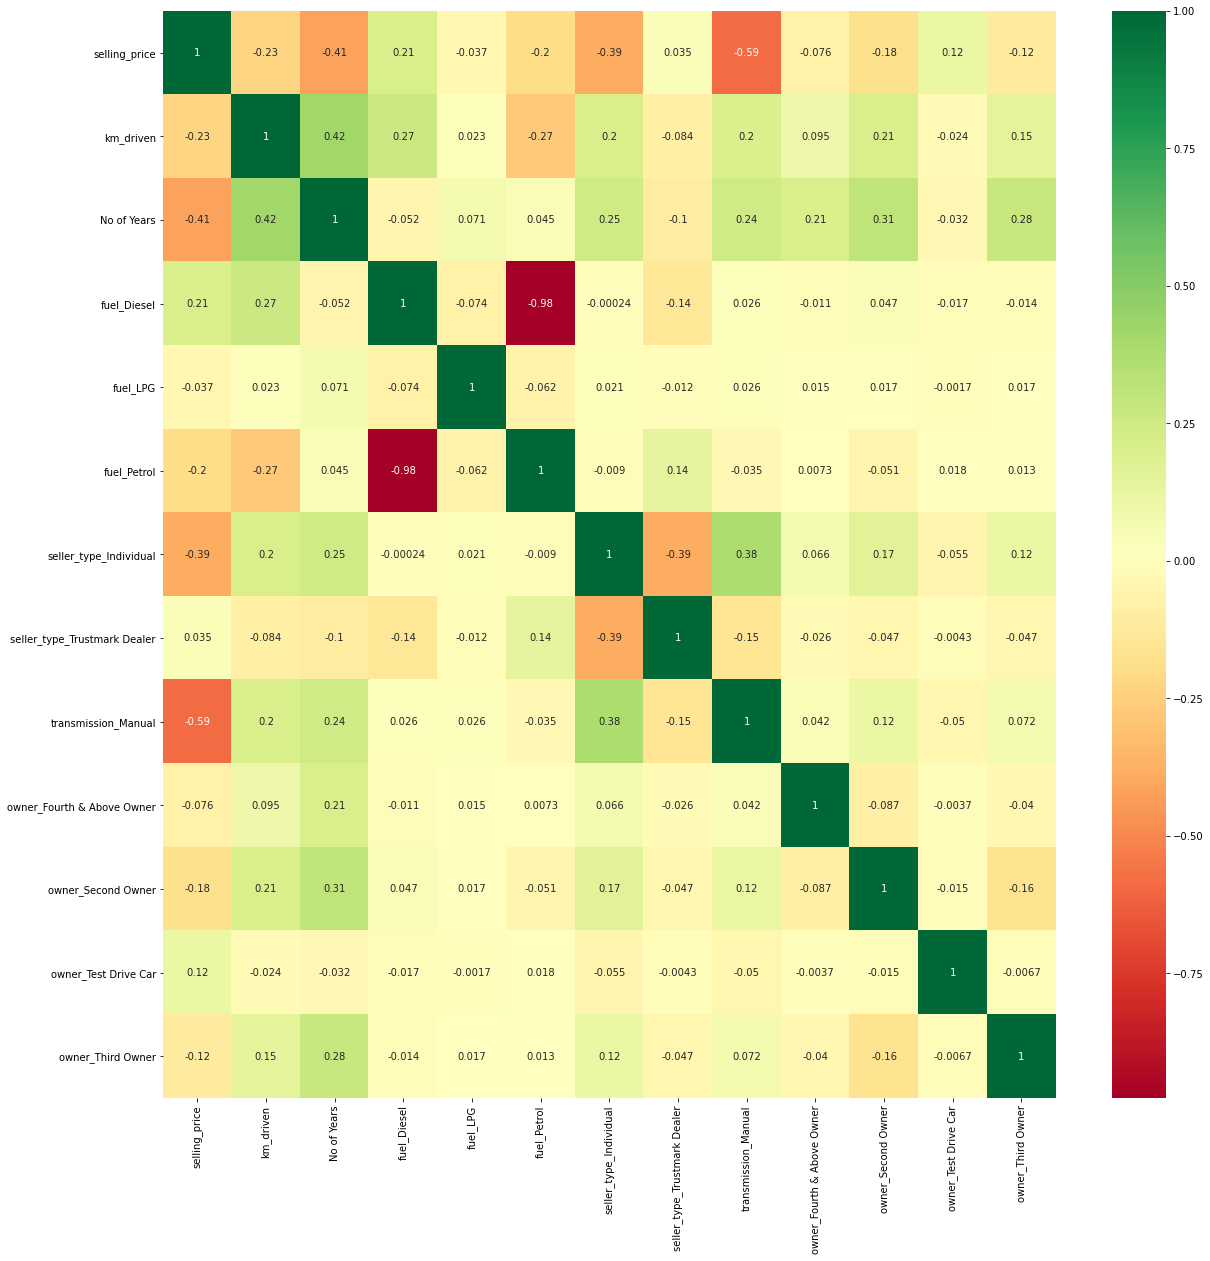

In [27]:
corrmat=data_set.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) #plot heat map 
g=sns.heatmap(data_set[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [32]:
x=data_set.iloc[:,1:]
y=data_set.iloc[:,0]

In [33]:
x.head()

,km_driven,No of Years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,8,1,0,0,1,0,1,0,0,0,0
1,120000,8,1,0,0,1,0,1,0,1,0,0
2,140000,16,0,0,1,1,0,1,0,0,0,1
3,127000,12,1,0,0,1,0,1,0,0,0,0
4,120000,15,0,0,1,1,0,1,0,0,0,0


In [34]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [36]:
print(model.feature_importances_)

[2.20301892e-01 2.00297313e-01 7.01233998e-02 6.84608720e-06
 4.30857226e-02 6.41949948e-02 1.31089521e-02 3.65847142e-01
 7.45067448e-04 9.73114060e-03 1.03725417e-02 2.18498866e-03]


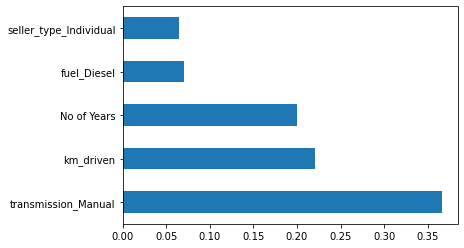

In [38]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=x.columns) 
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
X_train.shape

(6502, 12)

In [41]:
y_train.shape

(6502,)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
rf_pred=rf.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
r2_score(y_test,rf_pred)

0.8482124837249153